In [20]:
# Ref. https://medium.com/@connectwithghosh/simple-autoencoder-example-using-tensorflow-in-python-on-the-fashion-mnist-dataset-eee63b8ed9f1

# To check later https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/autoencoder.py

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!ls

bin			 lib64
etc			 pip-selfcheck.json
fashion-mnist_train.csv  pyvenv.cfg
include			 share
lib			 Simple_Autoencoder_with_TensorFlow.ipynb


In [4]:
import time

In [5]:
all_images = np.loadtxt('fashion-mnist_train.csv', delimiter=',', skiprows=1)[:,1:]

In [6]:
all_images.shape

(60000, 784)

In [7]:
%matplotlib inline

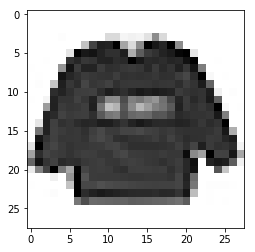

In [8]:
# view the first image
plt.imshow(all_images[0].reshape(28,28), cmap='Greys')
plt.show()

In [9]:
n_nodes_inp1 = 784 #encoder
n_nodes_hl1 = 32 #encoder

n_nodes_hl2 = 32 #decoder
n_nodes_out1 = 784 #decoder

In [10]:
# first hidden layer has 784*32 weights and 32 biases - input to hidden
hidden_1_layer_vals = {
    'weights': tf.Variable(tf.random_normal([n_nodes_inp1, n_nodes_hl1])),
    'biases': tf.Variable(tf.random_normal([n_nodes_hl1])) }


# second hidden layer has 32*32 weights and 32 biases - hidden to hidden

hidden_2_layer_vals = {
    'weights': tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
    'biases': tf.Variable(tf.random_normal([n_nodes_hl2])) }

# hidden layer to output, has 32*784 weights and 784 biases 

output_layer_vals = { 
    'weights': tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_out1])), 
    'biases': tf.Variable(tf.random_normal([n_nodes_out1])) }

In [11]:
#defining the neural net 

input_layer = tf.placeholder('float', [None, 784])

layer_1 = tf.nn.sigmoid(
    tf.add(tf.matmul(input_layer, hidden_1_layer_vals['weights']),
    hidden_1_layer_vals['biases']))

layer_2 = tf.nn.sigmoid(
    tf.add(tf.matmul(layer_1, hidden_2_layer_vals['weights']),
    hidden_2_layer_vals['biases']))

output_layer = tf.matmul(layer_2, output_layer_vals['weights']) + output_layer_vals['biases']

output_true = tf.placeholder('float', [None, 784])

In [12]:
# ?tf.matmul Multiplies matrix `a` by matrix `b`, producing `a` * `b`.

In [13]:
# defining cost function and optimizer

meansq = tf.reduce_mean(tf.square(output_layer - output_true))

learn_rate = 0.1
optimizer = tf.train.AdagradOptimizer(learn_rate).minimize(meansq)

In [14]:
#initialising stuff and starting the session

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [15]:
#defining the batch size, number of epochs and learning rate

batch_size = 10
hm_epochs = 100
tot_images = 10000

In [16]:
start_time = time.time()
for epoch in range(hm_epochs):
    epoch_loss = 0
    for i in range(int(tot_images/batch_size)):
        epoch_x = all_images[ i*batch_size : (i+1)*batch_size]
        
        _, c = sess.run([optimizer, meansq], feed_dict={input_layer:epoch_x,
                                                       output_true: epoch_x})
        epoch_loss += c

print('Epoch', epoch, '/', hm_epochs, 'loss', epoch_loss)
finish_time = time.time()
print('The duration was', finish_time - start_time)

Epoch 99 / 100 loss 3118687.6549072266
The duration was 95.38908743858337


In [17]:
# decoding an image

any_image = all_images[599]

# running though the autoencoder

output_any_image = sess.run(output_layer, feed_dict={input_layer:[any_image]})

encoded_any_image = sess.run(layer_1, feed_dict={input_layer:[any_image]})

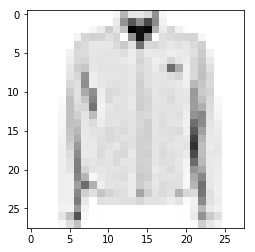

In [18]:
plt.imshow(any_image.reshape(28,28), cmap='Greys')
plt.show()

In [19]:
print(encoded_any_image) # print the encoded image

[[0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0.
  0. 0. 1. 1. 0. 0. 1. 1.]]
